In [47]:
    import os
    import numpy as np
    import matplotlib.pyplot as plt
    from io import StringIO
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import accuracy_score

In [13]:
class Filer():
    trFile = StringIO(readFile('face_train_data_960.txt'))
    tstFile = StringIO(readFile('face_test_data_960.txt'))
    trDat = np.loadtxt(trFile)
    tstDat = np.loadtxt(tstFile)
    Xtr, yTr = trDat[:, :-1], trDat[:, -1]
    Xtst, yTst = tstDat[:, :-1], tstDat[:, -1]

In [64]:
def myPCA(X):
    X_column_mean = np.mean(X,axis=0)
    centered_X = X - X_column_mean
    
    X_cov_matrix = np.cov(centered_X, rowvar=False)
    vals, vecs = np.linalg.eig(X_cov_matrix)
    latent = np.real(vals)
    coeff = np.real(vecs)
    
    index_sorted = np.argsort(latent)[::-1]
    sorted_vals = latent[index_sorted]
    
    sorted_vecs = coeff[:,index_sorted]
    
    latent = sorted_vals
    coeff = sorted_vecs

    return coeff, latent


In [57]:
def eigenfaces(data):
    coeff, _ = myPCA(data)
    for x in range(5):
        eigen_face_image = coeff[:, x].reshape(30, 32)
        plt.imshow(eigen_face_image, cmap='gray')
        plt.title(f'Eigenface {x+1}')
        plt.axis('off')
        plt.show()

In [58]:
def ProportionOfVariance(trDat):
    
    coeff, latent = myPCA(trDat)
    totVar = np.sum(latent)
    varExp = [(latent[i] / totVar) for i in range(len(latent))]
    cumVar = np.cumsum(varExp)
    k = np.argmax(cumVar >= 0.90) + 1 
    plt.plot(cumVar)
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance')
    plt.title('Explained Variance by Principal Components')
    plt.axvline(x=k, color='r', linestyle='--', label=f'90% Variance Explained (k={k})')
    plt.legend()
    plt.grid()
    plt.show()
    return k


In [59]:
def projDat(data, coeff, k):
    return np.dot(data, coeff[:, :k])


In [60]:
def readFile(x):
    file = open(x, "r")
    content = file.read()
    file.close()
    return content

In [65]:
def KNN(f):
    kVals = [1, 3, 5, 7]
    for kval in kVals:
        PXtr = projDat(Xtr, coeff, kval)
        PXtes = projDat(Xtst, coeff, kval)
        knn = KNeighborsClassifier()
        knn.fit(PXtr, f.yTr)
        yPred = knn.predict(PXtes)
        accu = accuracy_score(f.yTst, yPred)
        print("Accuracy for k"+str(kval)+" = "+str(accu))


In [66]:
def ReconStruct(coeff, latent):
    for k in [50, 100]:
        trPCA = np.dot(f.Xtr, coeff[:, :k])
        reconstructedTR = np.dot(trPCA, coeff[:, :k].T)
        fullyReconstructedTR = reconstructedTR + np.mean(Xtr, axis=0)
    
    fig, axes = plt.subplots(1, 5, figsize=(15, 3))
    for i in range(5):
      axes[i].imshow(fullyReconstructedTR[i].reshape(30, 32), cmap='gray')
      axes[i].axis('off')
    plt.show()

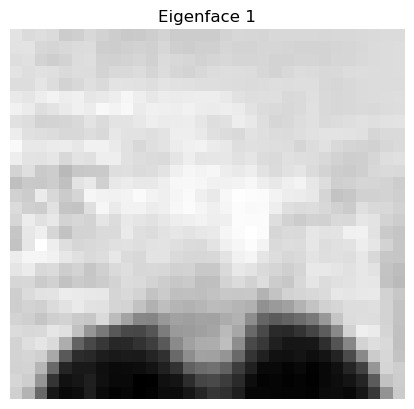

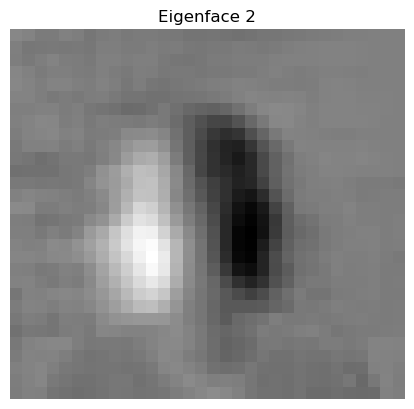

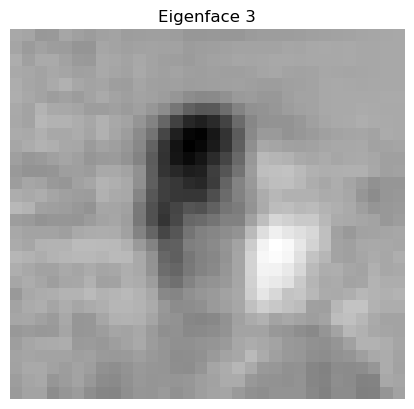

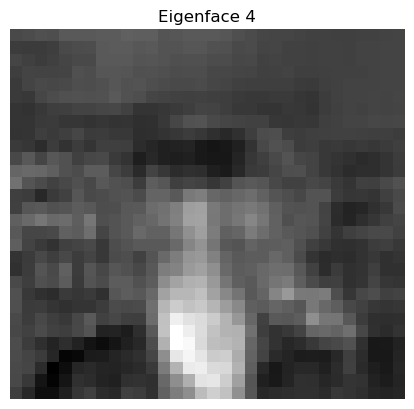

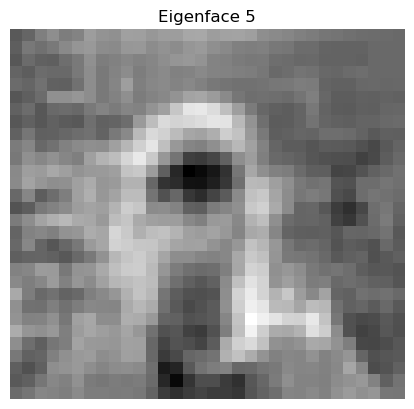

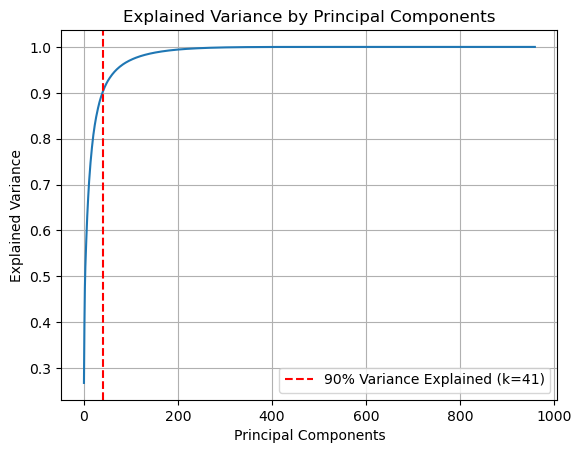

Accuracy for k1 = 0.7258064516129032
Accuracy for k3 = 0.7661290322580645
Accuracy for k5 = 0.7419354838709677
Accuracy for k7 = 0.7258064516129032
Accuracy for k40 = 0.5967741935483871


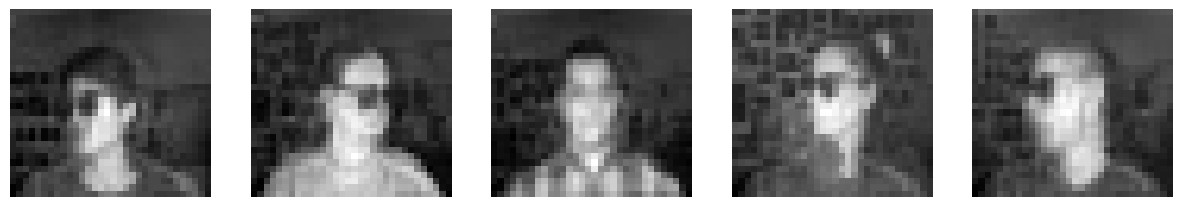

In [67]:
    f = Filer()
    Xtr, yTr = f.trDat[:, :-1], f.trDat[:, -1]
    Xtst, yTst = f.tstDat[:, :-1], f.tstDat[:, -1]
    #print('a')
    coeff, latent = myPCA(f.Xtr)
    #print('b')
    eigenfaces(f.Xtr)
    #print('c')
    k = ProportionOfVariance(f.Xtr)
    #print('d')
    KNN(f)
    #print('e')
    ReconStruct(coeff, latent)